In [65]:
# Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import config

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
# Twitter API Keys
consumer_key = config.consumer_key
consumer_secret = config.consumer_secret
access_token = config.access_token
access_token_secret = config.access_token_secret

In [73]:
# auth tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
compound_list = []

In [74]:
end_time = time.time() + 60
target_term = 'Trump'
last_id = ''

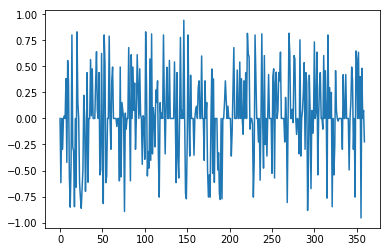

In [75]:
while time.time() < end_time:
    time.sleep(2)
    clear_output()
    public_tweets = api.search(target_term, since_id = last_id)
    for tweet in public_tweets['statuses']:
        target_string = tweet['text']
        tweet_compound = analyzer.polarity_scores(target_string)["compound"]
        compound_list.append(tweet_compound)
        last_id = tweet['id']

    plt.plot(np.arange(len(compound_list)), compound_list)
    plt.show()